<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/dropout_%E5%AE%8C%E6%95%B4%E5%AE%9E%E7%8E%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torchvision 
import torchvision.transforms as transforms
from IPython import display
import torch.nn as nn
import torch.optim as optim
import sys
import time
import matplotlib.pyplot as plt
import torch.nn.init as init
FILENAME = './content/lp'

In [15]:
num_epochs = 5
batch_size = 256
lr = 0.5

In [16]:
mnist_train = torchvision.datasets.FashionMNIST(root=FILENAME,train=True,transform=transforms.ToTensor(),download=True)
mnist_test = torchvision.datasets.FashionMNIST(root=FILENAME,train=False,transform=transforms.ToTensor(),download=True)

In [17]:
if sys.platform.startswith('win'):
  num_workers = 0
else:
  num_workers = 2
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=True,num_workers=num_workers)

In [18]:
def get_fashion_mnist(labels):
  text_labels=['t-shirt','trouser','pullover','dress','coat','sandal','sneaker','bag','ankle','boot']
  return (text_labels[int(i)] for i in labels)

In [19]:
def show_fashion_mnsit(images,labels):
   _,img = plt.subplots(1,len(images),figsize=(12,12))
   for i,image,lbl in zip(img,images,labels):
      i.imshow(image.view(28,-1))
      i.set_title(lbl)
      i.axes.get_xaxis().set_visible(True)
      i.axes.get_yaxis().set_visible(True)
   plt.show()

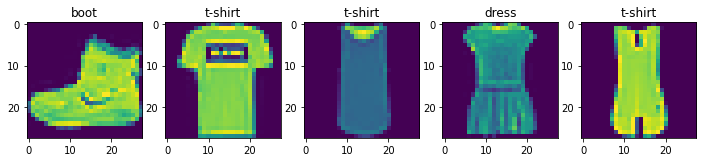

In [20]:
x = []
y = []
for i in range(5):
  x.append(mnist_train[i][0])
  y.append(mnist_train[i][1])
show_fashion_mnsit(x,get_fashion_mnist(y))

In [21]:
num_inputs = 784
num_hiddens1 = 256
num_hiddens2 = 256
num_outputs = 10
drop_prob1=0.2
drop_prob2 = 0.5

In [22]:
class FlattenLayer(nn.Module):
  def __init__(self):
    super(FlattenLayer,self).__init__()
  def forward(self,x):
    return x.view(x.shape[0],-1)

In [23]:
from torch.nn.modules.dropout import Dropout
from torch.nn.modules.activation import ReLU
net = nn.Sequential(
    FlattenLayer(),
    nn.Linear(num_inputs,num_hiddens1),
    nn.ReLU(),
    nn.Dropout(drop_prob1),
    nn.Linear(num_hiddens1,num_hiddens2),
    nn.ReLU(),
    nn.Dropout(drop_prob2),
    nn.Linear(num_hiddens2,num_outputs)
)
for param in net.parameters():
  init.normal_(param,mean=0,std=0.01)

In [25]:
optimizer = torch.optim.SGD(net.parameters(),lr)
loss = torch.nn.CrossEntropyLoss()

In [26]:
def evaculate_accuracy(data_iter,net):
  acc_sum=0.0
  n=0
  for X,y in data_iter:
    if isinstance(net,nn.Module):
      net.eval()
      acc_sum += (net(X).argmax(dim=1)==y).float().sum().item()
      net.train()
    else:
      if('is_training' in net.__code__.co_varnames):
        acc_sum += (net(X,is_training=False).argmax(dim=1)==y).float().sum().item()
      else:
        acc_sum += (net(X).argmax(dim=1)==y).float().sum().item()
    n += y.shape[0]
    return acc_sum/n

In [41]:
def train_ch4(net,train_iter,test_iter,num_epochs,loss,lr=None,params=None,optimizer=None):
  for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc_sum=0.0
    n=0
    cycle_time= 0
    for X,y in train_iter:
      y_hat = net(X)
      l = loss(y_hat,y).sum()
      optimizer.zero_grad()
      l.backward()
      optimizer.step()
      cycle_time+=1
      print('cycle_time:%d'%(cycle_time),end=' ')

      train_loss += l.item()
      train_acc_sum += (net(X).argmax(dim=1)==y).float().sum().item()
      n += y.shape[0]

    print('\n')
    test_acc_sum = evaculate_accuracy(test_iter,net)
    print('train:%d,loss:%.4f,train_acc:%.3f,test_acc:%.3f'%(epoch+1,train_loss/n,train_acc_sum/n,test_acc_sum))

In [42]:
train_ch4(net,train_iter,test_iter,num_epochs,loss,lr=lr,params=None,optimizer=optimizer)

cycle_time:1 cycle_time:2 cycle_time:3 cycle_time:4 cycle_time:5 cycle_time:6 cycle_time:7 cycle_time:8 cycle_time:9 cycle_time:10 cycle_time:11 cycle_time:12 cycle_time:13 cycle_time:14 cycle_time:15 cycle_time:16 cycle_time:17 cycle_time:18 cycle_time:19 cycle_time:20 cycle_time:21 cycle_time:22 cycle_time:23 cycle_time:24 cycle_time:25 cycle_time:26 cycle_time:27 cycle_time:28 cycle_time:29 cycle_time:30 cycle_time:31 cycle_time:32 cycle_time:33 cycle_time:34 cycle_time:35 cycle_time:36 cycle_time:37 cycle_time:38 cycle_time:39 cycle_time:40 cycle_time:41 cycle_time:42 cycle_time:43 cycle_time:44 cycle_time:45 cycle_time:46 cycle_time:47 cycle_time:48 cycle_time:49 cycle_time:50 cycle_time:51 cycle_time:52 cycle_time:53 cycle_time:54 cycle_time:55 cycle_time:56 cycle_time:57 cycle_time:58 cycle_time:59 cycle_time:60 cycle_time:61 cycle_time:62 cycle_time:63 cycle_time:64 cycle_time:65 cycle_time:66 cycle_time:67 cycle_time:68 cycle_time:69 cycle_time:70 cycle_time:71 cycle_time:72 c

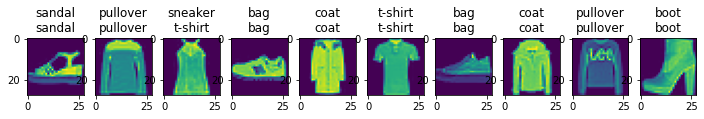

In [47]:
X,y = iter(test_iter).next()
true_labels = get_fashion_mnist(y.numpy())
pred_labels = get_fashion_mnist(net(X).argmax(dim=1).numpy())
titles = [true+'\n'+pred for true,pred in zip(true_labels,pred_labels)]
show_fashion_mnsit(X[10:20],titles[10:20])